The material balance equation (MBE) has long been recognized 
as one of the basic tools of reservoir engineers for interpreting 
and predicting reservoir performance. 

The MBE, when properly applied, can be used to:

• Estimate initial hydrocarbon volumes in 
place

• Predict future reservoir performance

• Predict ultimate hydrocarbon recovery under various types of primary driving mechanisms

What is MBE?
In its simplest form, the equation can be written on volumetric basis as:

Initial volume = volume remaining + volume remove


Drive mechanism
1.Depletion drive or solution gas drive: In this oil recovery mechanism wherein production is accomplished by expansion of original oil volume with all its gas dissolved.\

2.gas cap drive: In this mechanism, production is accomlished by free expansion of original free gas cap.

3.Water drive: In this mechanism, production is accomlished by net encroachment of water into oil zone. Effective water drive results in max. oil recovery.

4.Expansion drive: For undersaturated oil reservoirs with no water influx,the principal energy source is a result of rock and grain expansion




The Virginia Hills Beaverhill Lake field is a volumetric undersaturated reservoir. Volumetric calculations indicate the reservoir contains 270.6 MMSTB of
oil initially in place. The initial reservoir pressure is 3685 psi. The following
additional data are available:
Swi=24% cw = 3.62 * 10–6 psi–1 cf = 4.95* 10–6 psi–1
Bw = 1.0 bbl/STB pb =1500 psi

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn import linear_model 
from sklearn.linear_model import LinearRegression
import math
from scipy.interpolate import interp1d
from scipy.integrate import quad
from ipywidgets import interact,interactive

In [2]:
df=pd.read_excel('C:\\Users\\dell\\Downloads//drawdown.xlsx','Sheet3')
df.head()

,Pr,no.of producing well,Bo,Np,Wp
0,3685,1,1.3102,0.000,0.0
1,3680,2,1.3104,20.481,0.0
2,3676,2,1.3104,34.750,0.0
3,3667,3,1.3105,78.557,0.0
4,3664,4,1.3105,101.846,0.0


In [3]:
Cw=float(input('enter compressibility of water'))
Cf=float(input('enter compressibility of formation'))
Pi=float(input('enter the initial reservior pressure'))
Pb=float(input('enter the buble point reservior pressure'))
Swi=float(input('enter initial water saturation'))
N=float(input('enter initialy oil in place'))
Bw=float(input('enter water formation volume factor'))

enter compressibility of water3.62e-6
enter compressibility of formation4.95e-6
enter the initial reservior pressure3685
enter the buble point reservior pressure1500
enter initial water saturation0.24
enter initialy oil in place270.6
enter water formation volume factor1


enter compressibility of water3.62e-6 enter compressibility of formation4.95e-6 enter the initial reservior pressure3685 enter the buble point reservior pressure1500 enter initial water saturation0.24 enter initialy oil in place270.6 enter water formation volume factor1

In [4]:
df['dp']=-df['Pr']+Pi
df['F']=df['Np']*df['Bo'] + df['Wp']*Bw #F =withdrawl factor #mstb*bbl/stb
df['Eo']=df['Bo']-df['Bo'].loc[0]#Eo= expansion factor due to oil and dissolved gas
df['Efw']=df['Bo']*(((Cw*Swi)+Cf)/(1-Swi))*df['dp']#Efw =expansion factor due to expansion of water and pore volume
df['Et']=df['Eo']+df['Efw'] #bbl/stb


In [5]:
df.drop(index=9,inplace=True)


In [6]:
df

,Pr,no.of producing well,Bo,Np,Wp,dp,F,Eo,Efw,Et
0,3685,1,1.3102,0.000,0.000,0.0,0.000000,0.0000,0.000000,0.000000
1,3680,2,1.3104,20.481,0.000,5.0,26.838302,0.0002,0.000050,0.000250
2,3676,2,1.3104,34.750,0.000,9.0,45.536400,0.0002,0.000090,0.000290
3,3667,3,1.3105,78.557,0.000,18.0,102.948949,0.0003,0.000181,0.000481
4,3664,4,1.3105,101.846,0.000,21.0,133.469183,0.0003,0.000211,0.000511
5,3640,19,1.3109,215.681,0.000,45.0,282.736223,0.0007,0.000452,0.001152
6,3605,25,1.3116,364.613,0.000,80.0,478.226411,0.0014,0.000803,0.002203
7,3567,36,1.3122,542.985,0.159,118.0,712.663917,0.0020,0.001186,0.003186
8,3515,48,1.3128,841.591,0.805,170.0,1105.645665,0.0026,0.001709,0.004309
10,3360,59,1.3150,1691.887,5.008,325.0,2229.839405,0.0048,0.003272,0.008072


In [7]:
df.to_excel('new.xlsx',sheet_name='any',index=False)

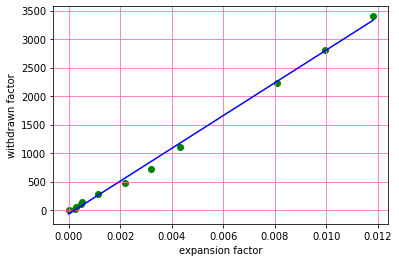

In [8]:
plt.scatter(df['Et'],(df['F']),color='green')
reg=linear_model.LinearRegression()
reg.fit(df[['Et']],df['F'])
plt.plot(df[['Et']],reg.predict(df[['Et']]),color='blue')
plt.xlabel('expansion factor')
plt.ylabel('withdrawn factor')
plt.grid(color='hotpink')

In [9]:
print(reg.coef_)
print(reg.intercept_)

active oil in place would be 287488 mstb 287.488

[287488.8383488]
-67.28429609420323


In [9]:
poly=np.polyfit(df['Et'],(df['F']),1) #another way
poly

array([ 2.89497643e+05, -5.52132201e+01])